In [11]:
params = {"figure.figsize": (12,9),
          "font.size": 20,
          "font.weight": "normal",
          "xtick.major.size": 9,
          "xtick.minor.size": 4,
          "ytick.major.size": 9,
          "ytick.minor.size": 4,
          "xtick.major.width": 4,
          "xtick.minor.width": 3,
          "ytick.major.width": 4,
          "ytick.minor.width": 3,
          "xtick.major.pad": 8,
          "xtick.minor.pad": 8,
          "ytick.major.pad": 8,
          "ytick.minor.pad": 8,
          "lines.linewidth": 3,
          "lines.markersize": 10,
          "axes.linewidth": 4,
          "legend.loc": "best",
          "text.usetex": False,    
          "xtick.labelsize" : 20,
          "ytick.labelsize" : 20,
          }

import matplotlib
matplotlib.rcParams.update(params)

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText

% matplotlib inline

# The Spectral Energy Distribution of TYC 8332-2529-1

This SED was made and analysed by Iain McDonald. This is just the plotting method for the data points and model. Iain used the software described in McDonald et al. (2012, 2017) to fit BT-SETTL model atmospheres to the star. The best fit model is plotted here. To find the sources of the data points used, please refer to the paper.

In [13]:
save_figures = False

In [14]:
sed_datapoints = np.genfromtxt('TYC_SED_datapoints.txt',
                               skip_header=15)[:, 3:-1]
sed_model_points = np.genfromtxt('TYC_SED_model.txt')

In [15]:
model_wl = sed_model_points[:, 0] # in angstrom
model_flux = (sed_model_points[:, 1] * model_wl**2.)/1.0e18
model_wl = (model_wl/10.)/1.000275346 # in nm and vacuum wls

fluxes= []
wls = []
for i in range(len(model_flux)//500+1):
    a = i*500
    b = (i+1)*500
    wls.append(np.nanmean(model_wl[a:b]))
    fluxes.append(np.nanmean(model_flux[a:b]))    
wls = np.array(wls)
fluxes = np.array(fluxes)

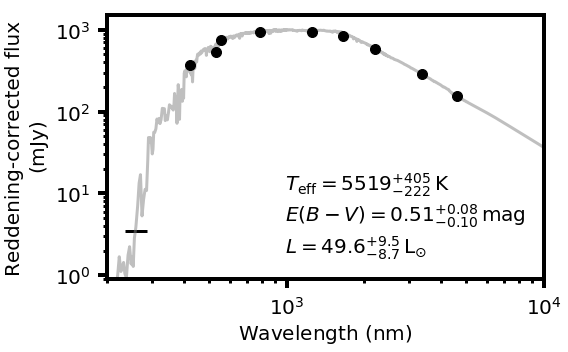

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

ax.errorbar(sed_datapoints[:, 0], sed_datapoints[:, 3], fmt='o', c='Black')
ax.plot(wls, fluxes, 'Grey', alpha=0.5)
ax.errorbar(2600/10., 3.50, xerr=(500./10.)/2., c='Black', fmt='-')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(200, 10000)
ax.set_ylim(0.9, 1500)

ax.set_ylabel((r'Reddening-corrected flux'+'\n'+
               r'$\left(\mathrm{mJy}\right)}=0.51\right)$'), fontsize=20)
ax.set_xlabel(r'Wavelength $\left(\mathrm{nm}\right)$', fontsize=20)

params = (r'$T_{\mathrm{eff}}=5519^{+405}_{-222}\,\mathrm{K}$'+'\n'+
          r'$E \left( B-V \right) =0.51^{+0.08}_{-0.10}\,\mathrm{mag}$'+'\n'+
          r'$L=49.6^{+9.5}_{-8.7}\,\mathrm{L_{\odot}}$')

info_text = AnchoredText(params,
                         loc='lower right',
                         prop=dict(fontsize=20),
                         frameon=False)
ax.add_artist(info_text)

fig.tight_layout()

if save_figures:
    fig.savefig('TYC_SED.eps')